In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn
seaborn.set()

In [2]:
df = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])

In [3]:
# Find tweets that contain an "n/10" rating
df['rating'] = df['text'].str.extract(r'(\d+(\.\d+)?)/10')[0].astype(float)

In [4]:
# Remove outliers (rating > 25/10)
df = df[df['rating'] <= 25]

In [5]:
def to_timestamp(date_time):
    return date_time.timestamp()

df['timestamp'] = df['created_at'].apply(to_timestamp)

In [6]:
fit = stats.linregress(df['timestamp'], df['rating'])

## Results

In [7]:
df['prediction'] = df['timestamp']*fit.slope + fit.intercept

In [8]:
df

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09,12.303514
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09,12.301817
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09,12.300888
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09,12.295770
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09,12.294144
...,...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0,1.592936e+09,13.308733
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0,1.592843e+09,13.307333
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0,1.592776e+09,13.306330
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0,1.592526e+09,13.302583


In [9]:
fit.slope, fit.intercept

(1.5002953343735724e-08, -10.59001653360649)

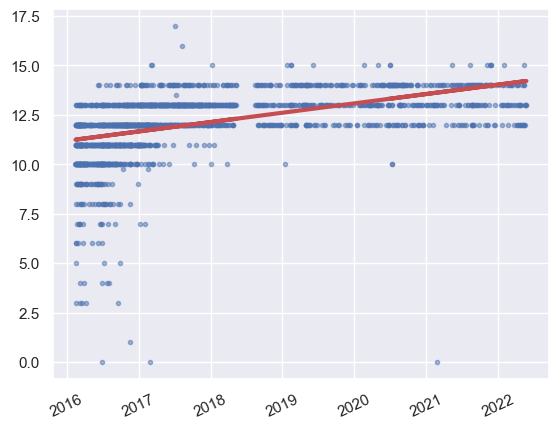

In [10]:
plt.xticks(rotation=25)
plt.plot(df['created_at'], df['rating'], 'b.', alpha=0.5)
plt.plot(df['created_at'], df['prediction'], 'r-', linewidth=3)
plt.show()

In [11]:
fit.pvalue

2.536058725135737e-127

In [12]:
df['residuals'] = df['rating'] - df['prediction']

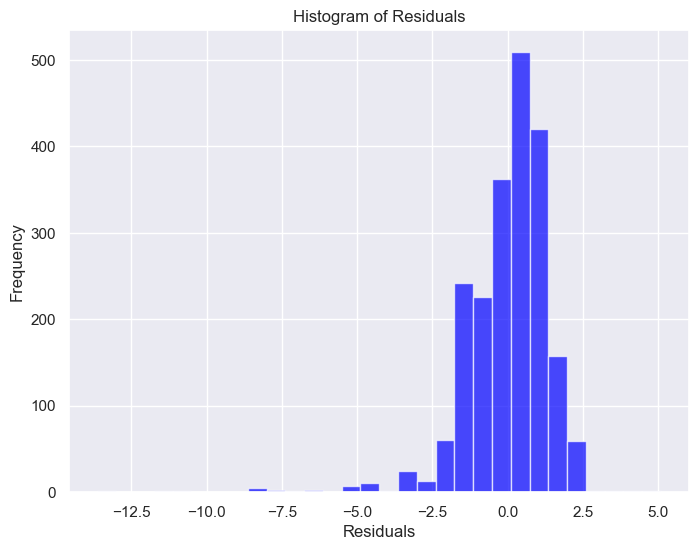

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['residuals'], bins=30, color='blue', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()